In [1]:
#importing libraries
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker 
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import json, requests
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mode
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
##Computing false and true positive rates
from sklearn.metrics import roc_curve
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
np.random.seed(60)
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import sklearn.metrics as metrics
import warnings
warnings.simplefilter("ignore")
import sys
import os

%matplotlib inline

In [2]:
os.chdir(r"D:\aMOD\New folder")
dataset = pd.read_csv("Combined pure_SV3.csv")

In [3]:
dataset.head().T

0          1        2          3  \
Serial Number                     1.000000   5.000000  6.00000   7.000000   
DISCWT                            1.747191   2.680682  2.55229   1.769336   
FEMALE                            0.000000   1.000000  0.00000   0.000000   
LOS                               1.000000  21.000000  1.00000  15.000000   
Primary_Insurance                 0.000000   0.000000  0.00000   0.000000   
Medican_Household_Income          1.000000   1.000000  1.00000   1.000000   
Hospital_Urban-Rural_Designation  1.000000   1.000000  2.00000   1.000000   
Teaching_Status_of_Hospital       0.000000   0.000000  0.00000   1.000000   
BPD                               0.000000   1.000000  0.00000   1.000000   
CHD                               1.000000   0.000000  0.00000   0.000000   
Age_Groups                        2.000000   2.000000  2.00000   2.000000   
Sepsis                            0.000000   0.000000  0.00000   0.000000   
Mechanical_Ventilation            0.000000   0.000000  0.00000   1.000000   
ECMO                              0.000000   0.000000  0.00000   0.000000   
Intubation                        0.000000   0.000000  0.00000   1.000000   
Resp_Infection                    0.000000   0.000000  1.00000   1.000000   
30_day_readmission                0.000000   0.000000  0.00000   0.000000   

                                          4  
Serial Number                      8.000000  
DISCWT                             4.215581  
FEMALE                             0.000000  
LOS                               12.000000  
Primary_Insurance                  0.000000  
Medican_Household_Income           1.000000  
Hospital_Urban-Rural_Designation   2.000000  
Teaching_Status_of_Hospital        0.000000  
BPD                                1.000000  
CHD                                1.000000  
Age_Groups                         1.000000  
Sepsis                             0.000000  
Mechanical_Ventilation             1.000000  
ECMO                               0.000000  
Intubation                         0.000000  
Resp_Infection                     0.000000  
30_day_readmission                 0.000000

In [4]:
dataset.columns

Index(['Serial Number', 'DISCWT', 'FEMALE', 'LOS', 'Primary_Insurance',
       'Medican_Household_Income', 'Hospital_Urban-Rural_Designation',
       'Teaching_Status_of_Hospital', 'BPD', 'CHD', 'Age_Groups', 'Sepsis',
       'Mechanical_Ventilation', 'ECMO', 'Intubation', 'Resp_Infection',
       '30_day_readmission'],
      dtype='object')

In [5]:
#data correlation is done and rounded the values to three decimal places.
dataset.corr().round(3)

Serial Number  DISCWT  FEMALE    LOS  \
Serial Number                             1.000   0.018   0.048 -0.022   
DISCWT                                    0.018   1.000  -0.035  0.025   
FEMALE                                    0.048  -0.035   1.000  0.011   
LOS                                      -0.022   0.025   0.011  1.000   
Primary_Insurance                         0.005   0.004  -0.010 -0.042   
Medican_Household_Income                 -0.007   0.042  -0.018  0.005   
Hospital_Urban-Rural_Designation         -0.032   0.017  -0.010 -0.048   
Teaching_Status_of_Hospital               0.008   0.144  -0.025  0.005   
BPD                                      -0.039   0.071  -0.005  0.083   
CHD                                       0.047   0.132   0.007  0.035   
Age_Groups                               -0.014  -0.408   0.048 -0.075   
Sepsis                                    0.025  -0.007   0.028  0.078   
Mechanical_Ventilation                   -0.038   0.178  -0.040  0.069   
ECMO                                      0.022   0.031  -0.017  0.005   
Intubation                               -0.032   0.203  -0.041  0.092   
Resp_Infection                           -0.039  -0.041   0.005  0.000   
30_day_readmission                        0.613  -0.012   0.045  0.010   

                                  Primary_Insurance  Medican_Household_Income  \
Serial Number                                 0.005                    -0.007   
DISCWT                                        0.004                     0.042   
FEMALE                                       -0.010                    -0.018   
LOS                                          -0.042                     0.005   
Primary_Insurance                             1.000                     0.263   
Medican_Household_Income                      0.263                     1.000   
Hospital_Urban-Rural_Designation             -0.018                    -0.181   
Teaching_Status_of_Hospital                   0.031                    -0.007   
BPD                                          -0.080                    -0.025   
CHD                                           0.029                     0.054   
Age_Groups                                    0.044                    -0.007   
Sepsis                                       -0.018                    -0.027   
Mechanical_Ventilation                       -0.012                     0.013   
ECMO                                          0.068                     0.031   
Intubation                                    0.007                     0.019   
Resp_Infection                               -0.077                    -0.044   
30_day_readmission                           -0.049                    -0.031   

                                  Hospital_Urban-Rural_Designation  \
Serial Number                                               -0.032   
DISCWT                                                       0.017   
FEMALE                                                      -0.010   
LOS                                                         -0.048   
Primary_Insurance                                           -0.018   
Medican_Household_Income                                    -0.181   
Hospital_Urban-Rural_Designation                             1.000   
Teaching_Status_of_Hospital                                  0.271   
BPD                                                         -0.070   
CHD                                                         -0.052   
Age_Groups                                                  -0.082   
Sepsis                                                      -0.044   
Mechanical_Ventilation                                       0.027   
ECMO                                                        -0.054   
Intubation                                                   0.061   
Resp_Infection                                               0.019   
30_day_readmission                                  

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.describe()

Serial Number       DISCWT       FEMALE          LOS  \
count    2903.000000  2903.000000  2903.000000  2903.000000   
mean     1452.000000     3.617264     0.470548    21.245952   
std       838.168241     2.363205     0.499218   132.384645   
min         1.000000     1.040020     0.000000 -6666.000000   
25%       726.500000     1.879154     0.000000     3.000000   
50%      1452.000000     2.471905     0.000000     7.000000   
75%      2177.500000     4.974157     1.000000    19.000000   
max      2903.000000    15.908756     1.000000   363.000000   

       Primary_Insurance  Medican_Household_Income  \
count        2903.000000               2903.000000   
mean            1.217017                  2.223562   
std             1.635799                  1.066679   
min             0.000000                  1.000000   
25%             0.000000                  1.000000   
50%             0.000000                  2.000000   
75%             3.000000                  3.000000   
max             6.000000                  4.000000   

       Hospital_Urban-Rural_Designation  Teaching_Status_of_Hospital  \
count                       2903.000000                  2903.000000   
mean                           1.344127                     0.083018   
std                            0.504705                     0.319907   
min                            1.000000                     0.000000   
25%                            1.000000                     0.000000   
50%                            1.000000                     0.000000   
75%                            2.000000                     0.000000   
max                            4.000000                     2.000000   

               BPD          CHD   Age_Groups       Sepsis  \
count  2903.000000  2903.000000  2903.000000  2903.000000   
mean      0.159490     0.486738     1.949707     0.061660   
std       0.366196     0.499910     1.010056     0.240579   
min       0.000000     0.000000     1.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000   
50%       0.000000     0.000000     2.000000     0.000000   
75%       0.000000     1.000000     2.000000     0.000000   
max       1.000000     1.000000     4.000000     1.000000   

       Mechanical_Ventilation         ECMO   Intubation  Resp_Infection  \
count             2903.000000  2903.000000  2903.000000     2903.000000   
mean                 0.267654     0.071306     0.131932        0.305202   
std                  0.442813     0.257379     0.338476        0.460572   
min                  0.000000     0.000000     0.000000        0.000000   
25%                  0.000000     0.000000     0.000000        0.000000   
50%                  0.000000     0.000000     0.000000        0.000000   
75%                  1.000000     0.000000     0.000000        1.000000   
max                  1.000000     1.000000     1.000000        1.000000   

       30_day_readmission  
count         2903.000000  
mean             0.147089  
std              0.354256  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

In [8]:
dataset.shape

(2903, 17)

In [9]:
dataset.isnull().any()

Serial Number                       False
DISCWT                              False
FEMALE                              False
LOS                                 False
Primary_Insurance                   False
Medican_Household_Income            False
Hospital_Urban-Rural_Designation    False
Teaching_Status_of_Hospital         False
BPD                                 False
CHD                                 False
Age_Groups                          False
Sepsis                              False
Mechanical_Ventilation              False
ECMO                                False
Intubation                          False
Resp_Infection                      False
30_day_readmission                  False
dtype: bool

In [10]:
dataset.isnull().sum()

Serial Number                       0
DISCWT                              0
FEMALE                              0
LOS                                 0
Primary_Insurance                   0
Medican_Household_Income            0
Hospital_Urban-Rural_Designation    0
Teaching_Status_of_Hospital         0
BPD                                 0
CHD                                 0
Age_Groups                          0
Sepsis                              0
Mechanical_Ventilation              0
ECMO                                0
Intubation                          0
Resp_Infection                      0
30_day_readmission                  0
dtype: int64

In [11]:
#Dropping variables
dataset.drop(['Serial Number','DISCWT'],axis = 1,inplace=True)

In [12]:
dataset.head(51).T

0   1   2   3   4   5   6   7   8   9   ...  \
FEMALE                             0   1   0   0   0   1   0   0   1   1  ...   
LOS                                1  21   1  15  12  52   3   7   2  12  ...   
Primary_Insurance                  0   0   0   0   0   0   0   0   0   0  ...   
Medican_Household_Income           1   1   1   1   1   1   1   1   1   1  ...   
Hospital_Urban-Rural_Designation   1   1   2   1   2   1   2   2   2   1  ...   
Teaching_Status_of_Hospital        0   0   0   1   0   0   0   0   0   0  ...   
BPD                                0   1   0   1   1   1   0   1   0   0  ...   
CHD                                1   0   0   0   1   1   0   0   0   0  ...   
Age_Groups                         2   2   2   2   1   1   2   2   3   2  ...   
Sepsis                             0   0   0   0   0   0   0   0   0   0  ...   
Mechanical_Ventilation             0   0   0   1   1   1   0   0   0   0  ...   
ECMO                               0   0   0   0   0   0   0   0   0   0  ...   
Intubation                         0   0   0   1   0   0   0   0   0   0  ...   
Resp_Infection                     0   0   1   1   0   0   1   1   0   0  ...   
30_day_readmission                 0   0   0   0   0   0   0   0   0   0  ...   

                                  41   42  43  44  45  46  47   48  49  50  
FEMALE                             0    0   1   0   0   0   0    0   0   1  
LOS                                3  107   3   4  18   4   3  138   5   1  
Primary_Insurance                  0    0   0   0   0   0   3    3   0   0  
Medican_Household_Income           1    1   1   1   1   1   1    1   1   1  
Hospital_Urban-Rural_Designation   2    1   1   2   2   2   1    1   1   2  
Teaching_Status_of_Hospital        0    0   0   0   0   0   0    0   0   0  
BPD                                0    0   0   0   1   0   0    1   0   0  
CHD                                1    1   0   1   0   0   0    1   0   0  
Age_Groups                         1    1   2   1   2   2   2    1   4   4  
Sepsis                             0    0   0   0   0   0   0    0   0   0  
Mechanical_Ventilation             0    0   0   0   0   0   0    1   0   0  
ECMO                               0    0   0   0   0   0   0    0   0   0  
Intubation                         0    0   0   0   0   0   0    1   0   0  
Resp_Infection                     0    0   0   1   1   0   1    0   0   0  
30_day_readmission                 0    0   0   0   0   0   0    0   0   0  

[15 rows x 51 columns]

In [13]:
dataset.dtypes

FEMALE                              int64
LOS                                 int64
Primary_Insurance                   int64
Medican_Household_Income            int64
Hospital_Urban-Rural_Designation    int64
Teaching_Status_of_Hospital         int64
BPD                                 int64
CHD                                 int64
Age_Groups                          int64
Sepsis                              int64
Mechanical_Ventilation              int64
ECMO                                int64
Intubation                          int64
Resp_Infection                      int64
30_day_readmission                  int64
dtype: object

In [14]:
dataset.corr()

FEMALE       LOS  Primary_Insurance  \
FEMALE                            1.000000  0.011414          -0.010315   
LOS                               0.011414  1.000000          -0.041619   
Primary_Insurance                -0.010315 -0.041619           1.000000   
Medican_Household_Income         -0.017721  0.005064           0.262689   
Hospital_Urban-Rural_Designation -0.009679 -0.047508          -0.017864   
Teaching_Status_of_Hospital      -0.024602  0.004595           0.030751   
BPD                              -0.005398  0.083087          -0.079660   
CHD                               0.007064  0.034966           0.028804   
Age_Groups                        0.048315 -0.074915           0.043523   
Sepsis                            0.028037  0.078203          -0.018253   
Mechanical_Ventilation           -0.039930  0.069109          -0.012189   
ECMO                             -0.017173  0.004754           0.067996   
Intubation                       -0.041235  0.092389           0.007395   
Resp_Infection                    0.004638  0.000266          -0.076509   
30_day_readmission                0.044963  0.010360          -0.048562   

                                  Medican_Household_Income  \
FEMALE                                           -0.017721   
LOS                                               0.005064   
Primary_Insurance                                 0.262689   
Medican_Household_Income                          1.000000   
Hospital_Urban-Rural_Designation                 -0.181358   
Teaching_Status_of_Hospital                      -0.006946   
BPD                                              -0.025150   
CHD                                               0.053705   
Age_Groups                                       -0.007151   
Sepsis                                           -0.026880   
Mechanical_Ventilation                            0.012616   
ECMO                                              0.031031   
Intubation                                        0.019447   
Resp_Infection                                   -0.044242   
30_day_readmission                               -0.030513   

                                  Hospital_Urban-Rural_Designation  \
FEMALE                                                   -0.009679   
LOS                                                      -0.047508   
Primary_Insurance                                        -0.017864   
Medican_Household_Income                                 -0.181358   
Hospital_Urban-Rural_Designation                          1.000000   
Teaching_Status_of_Hospital                               0.271187   
BPD                                                      -0.069601   
CHD                                                      -0.052242   
Age_Groups                                               -0.081627   
Sepsis                                                   -0.044269   
Mechanical_Ventilation                                    0.027158   
ECMO                                                     -0.053676   
Intubation                                                0.060917   
Resp_Infection                                            0.019425   
30_day_readmission                                       -0.053853   

                                  Teaching_Status_of_Hospital       BPD  \
FEMALE                                              -0.024602 -0.005398   
LOS                                                  0.004595  0.083087   
Primary_Insurance                                    0.030751 -0.079660   
Medican_Household_Income                            -0.006946 -0.025150   
Hospital_Urban-Rural_Designation                     0.271187 -0.069601   
Teaching_Status_of_Hospital                          1.000000 -0.042466   
BPD                                                 -0.042466  1.000000   
CHD                                                 -0.045903 -0.011971   
Age_Groups                                    

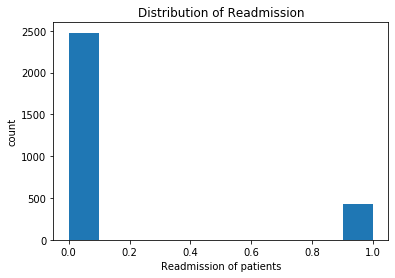

In [15]:
plt.hist(dataset["30_day_readmission"])
plt.title("Distribution of Readmission")
plt.xlabel("Readmission of patients")
plt.ylabel("count")
plt.show()

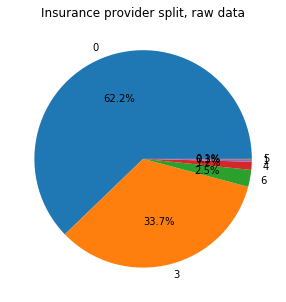

In [16]:
fig = plt.figure(figsize=(5,5))
dataset.Primary_Insurance.value_counts().plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Insurance provider split, raw data')
plt.ylabel('')
fig.savefig('raw_insurance.png')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text yticklabel objects>)

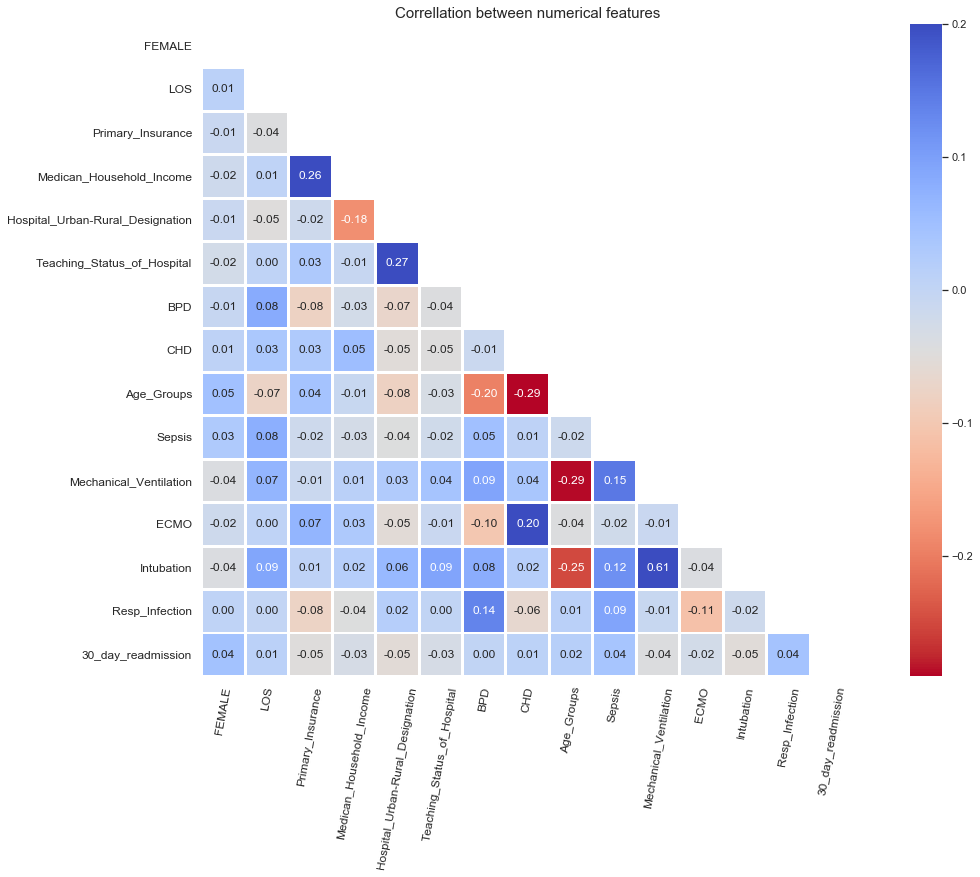

In [17]:
# Correlation heatmap
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),mask=mask, annot= True, vmax=.2,cmap = 'coolwarm_r', square=True, fmt='.2f',
            linewidths=2, cbar_kws={"shrink": 1})
plt.title('Correllation between numerical features', size = 15)
plt.xticks(rotation=80, size = 12)
plt.yticks(size = 12)

Model Selection: Feature Importance¶
One path for improving your models to understand what features are important to your models. This can usually only be investigated for simpler models such as Logistic Regression or Random Forests. This analysis can help in a few areas:

- inspire new feature ideas --> helps with both high bias and high variance
- obtain a list of the top features to be used for feature reduction --> helps with high variance
- point out errors in your pipeline --> helps with robustness of model

In [18]:
X_train=dataset.drop('30_day_readmission',axis=1)
y_train=dataset['30_day_readmission']

In [19]:
def model(X_train,y_train,dataset,n_splits=3):
    scores=[]
    pars = {
        'colsample_bytree': 0.8,                 
        'learning_rate': 0.08,
        'max_depth': 10,
        'subsample': 1,
        'objective':'multi:softprob',
        'num_class':4,
        'eval_metric':'mlogloss',
        'min_child_weight':3,
        'gamma':0.25,
        'n_estimators':500
    }

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_pre=np.zeros((len(dataset),4),dtype=float)
    dataset=xgb.DMatrix(dataset.drop('30_day_readmission',axis=1))


    for train_index, val_index in kf.split(X_train, y_train):
        train_X = X_train.iloc[train_index]
        val_X = X_train.iloc[val_index]
        train_y = y_train[train_index]
        val_y = y_train[val_index]
        xgb_train = xgb.DMatrix(train_X, train_y)
        xgb_eval = xgb.DMatrix(val_X, val_y)

        xgb_model = xgb.train(pars,
                      xgb_train,
                      num_boost_round=1000,
                      evals=[(xgb_train, 'train'), (xgb_eval, 'val')],
                      verbose_eval=False,
                      early_stopping_rounds=20
                     )

        val_X=xgb.DMatrix(val_X)
        pred_val=[np.argmax(x) for x in xgb_model.predict(val_X)]
        score=cohen_kappa_score(pred_val,val_y,weights='quadratic')
        scores.append(score)
        print('choen_kappa_score :',score)

        pred=xgb_model.predict(dataset)
        y_pre+=pred

    pred = np.asarray([np.argmax(line) for line in y_pre])
    print('Mean score:',np.mean(scores))
    
    return xgb_model,pred

In [20]:
xgb_model,pred = model(X_train,y_train,dataset,3)

[17:36:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


choen_kappa_score : 0.019559442998578036
[17:36:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


choen_kappa_score : 0.006967585580127333
[17:36:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might n

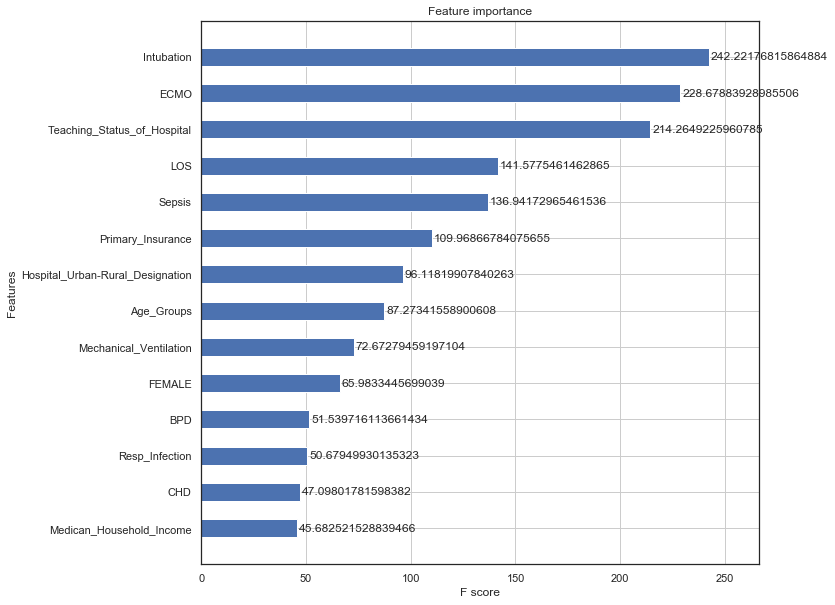

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='cover')
plt.show()

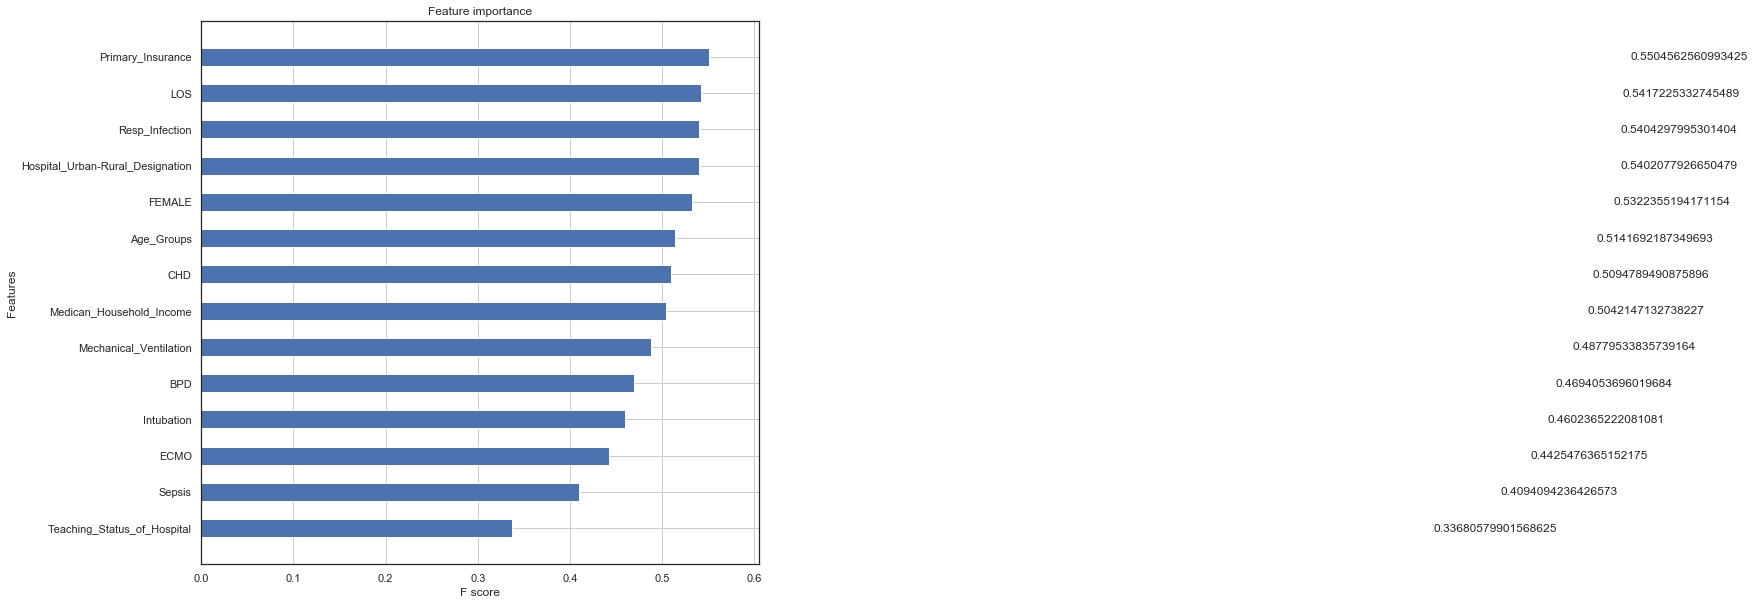

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

There are three methods to measure feature_importances in xgboost.They are :

weight : The total number of times this feature was used to split the data across all trees.
Cover :The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits.
Gain : The average loss reduction gained when using this feature for splitting in trees.

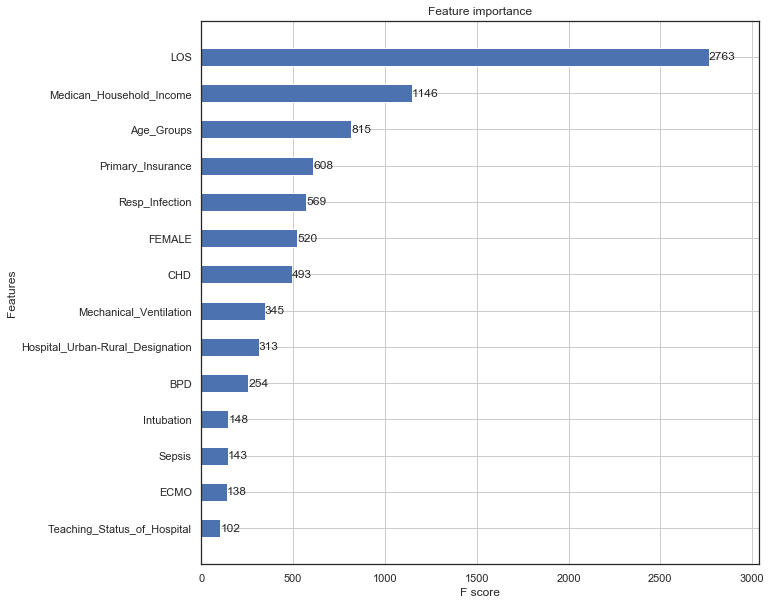

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.show()

In [24]:
feature_name = list(X_train.columns)
# no of maximum features we need to select
num_feats=13

def cor_selector(X_train, y_train,num_feats):
    cor_list = []
    feature_name = X_train.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X_train.columns.tolist():
        cor = np.corrcoef(X_train[i], y_train)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X_train.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

13 selected features


In [25]:
cor_feature

['CHD',
 'LOS',
 'Age_Groups',
 'ECMO',
 'Medican_Household_Income',
 'Teaching_Status_of_Hospital',
 'Sepsis',
 'Mechanical_Ventilation',
 'Resp_Infection',
 'FEMALE',
 'Primary_Insurance',
 'Intubation',
 'Hospital_Urban-Rural_Designation']

Chi-Square Features¶
This is another filter-based method.  In this method, we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [26]:
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

13 selected features


In [27]:
chi_selector

SelectKBest(k=13, score_func=<function chi2 at 0x000002A37E0423A8>)

In [28]:
chi_feature

['FEMALE',
 'Primary_Insurance',
 'Medican_Household_Income',
 'Hospital_Urban-Rural_Designation',
 'Teaching_Status_of_Hospital',
 'BPD',
 'CHD',
 'Age_Groups',
 'Sepsis',
 'Mechanical_Ventilation',
 'ECMO',
 'Intubation',
 'Resp_Infection']

Recursive Feature Elimination
This is a wrapper based method. As I said before, wrapper methods consider the selection of a set of features as a search problem.  From sklearn Documentation:

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

As you would have guessed we could use any estimator with the method. In this case, we use LogisticRegression and the RFE observes the coef_ attribute of the LogisticRegression object

In [29]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y_train)

Fitting estimator with 14 features.


RFE(estimator=LogisticRegression(), n_features_to_select=13, step=10, verbose=5)

In [30]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

13 selected features


In [31]:
rfe_feature

['FEMALE',
 'LOS',
 'Primary_Insurance',
 'Medican_Household_Income',
 'Hospital_Urban-Rural_Designation',
 'Teaching_Status_of_Hospital',
 'BPD',
 'CHD',
 'Sepsis',
 'Mechanical_Ventilation',
 'ECMO',
 'Intubation',
 'Resp_Infection']

Lasso: SelectFromModel
This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.  For example, Lasso, and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.  Here we use Lasso to select variables.

In [32]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y_train)

SelectFromModel(estimator=LogisticRegression(), max_features=13)

In [33]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

6 selected features


In [34]:
embeded_lr_feature

['Primary_Insurance',
 'Hospital_Urban-Rural_Designation',
 'Teaching_Status_of_Hospital',
 'Sepsis',
 'ECMO',
 'Intubation']

Tree-based: SelectFromModel¶
This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods. We can also use RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

In [35]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=13)

In [36]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

3 selected features


In [37]:
embeded_rf_feature

['LOS', 'Medican_Household_Income', 'Age_Groups']

We could also have used a LightGBM. Or an XGBoost object as long it has a featureimportances attribute.



In [38]:
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X_train, y_train)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                max_features=13)

In [39]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

6 selected features


In [40]:
embeded_lgb_feature

['FEMALE',
 'LOS',
 'Medican_Household_Income',
 'Hospital_Urban-Rural_Designation',
 'Age_Groups',
 'Mechanical_Ventilation']

In [41]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top feature
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

Feature  Pearson  Chi-2    RFE  Logistics  \
1           Medican_Household_Income     True   True   True      False   
2   Hospital_Urban-Rural_Designation     True   True   True       True   
3        Teaching_Status_of_Hospital     True   True   True       True   
4                             Sepsis     True   True   True       True   
5                  Primary_Insurance     True   True   True       True   
6             Mechanical_Ventilation     True   True   True      False   
7                                LOS     True  False   True      False   
8                         Intubation     True   True   True       True   
9                             FEMALE     True   True   True      False   
10                              ECMO     True   True   True       True   
11                        Age_Groups     True   True  False      False   
12                    Resp_Infection     True   True   True      False   
13                               CHD     True   True   True      False   

    Random Forest  LightGBM  Total  
1            True      True      5  
2           False      True      5  
3           False     False      4  
4           False     False      4  
5           False     False      4  
6           False      True      4  
7            True      True      4  
8           False     False      4  
9           False      True      4  
10          False     False      4  
11           True      True      4  
12          False     False      3  
13          False     False      3

In [42]:
df_dumm  = pd.get_dummies(dataset, columns=['Primary_Insurance','Medican_Household_Income','Hospital_Urban-Rural_Designation','Teaching_Status_of_Hospital','Age_Groups'])

In [43]:
df_dumm.columns

Index(['FEMALE', 'LOS', 'BPD', 'CHD', 'Sepsis', 'Mechanical_Ventilation',
       'ECMO', 'Intubation', 'Resp_Infection', '30_day_readmission',
       'Primary_Insurance_0', 'Primary_Insurance_1', 'Primary_Insurance_3',
       'Primary_Insurance_4', 'Primary_Insurance_5', 'Primary_Insurance_6',
       'Medican_Household_Income_1', 'Medican_Household_Income_2',
       'Medican_Household_Income_3', 'Medican_Household_Income_4',
       'Hospital_Urban-Rural_Designation_1',
       'Hospital_Urban-Rural_Designation_2',
       'Hospital_Urban-Rural_Designation_3',
       'Hospital_Urban-Rural_Designation_4', 'Teaching_Status_of_Hospital_0',
       'Teaching_Status_of_Hospital_1', 'Teaching_Status_of_Hospital_2',
       'Age_Groups_1', 'Age_Groups_2', 'Age_Groups_3', 'Age_Groups_4'],
      dtype='object')

In [44]:
x1 = df_dumm.drop('30_day_readmission',axis=1)
y1 = df_dumm['30_day_readmission']

In [45]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(ytest, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Readmission','No Readmission']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        

    
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(ytest, scores, pos_label=0)
    average_precision = average_precision_score(ytest, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()
    
target_names = ['Readmission ', 'No Readmission']

def calc_prevalence(y1):
    return (sum(y1)/len(y1))   

thresh = 0.5

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity


np.random.seed(1234)
rng=np.random.RandomState(1234)
def get_ci_auc( ytest, y_valid_preds ): 

    from scipy.stats import sem
    from sklearn.metrics import roc_auc_score 
   
    n_bootstraps = 1000   
    bootstrapped_scores = []   
   
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_valid_preds) - 1, len(y_valid_preds))
        #print('indices',np.unique(ytest[indices]))
        #print(indices)
        if len(np.unique(ytest[indices])) <= 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            score = roc_auc_score(ytest[indices], y_valid_preds[indices])
            bootstrapped_scores.append(score) 

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

   # 90% c.i.    
    confidence_lower = int(0.025 * len(sorted_scores))
    confidence_upper = int(0.975 * len(sorted_scores))

    return confidence_lower,confidence_upper

In [46]:
df_dumm.dtypes

FEMALE                                int64
LOS                                   int64
BPD                                   int64
CHD                                   int64
Sepsis                                int64
Mechanical_Ventilation                int64
ECMO                                  int64
Intubation                            int64
Resp_Infection                        int64
30_day_readmission                    int64
Primary_Insurance_0                   uint8
Primary_Insurance_1                   uint8
Primary_Insurance_3                   uint8
Primary_Insurance_4                   uint8
Primary_Insurance_5                   uint8
Primary_Insurance_6                   uint8
Medican_Household_Income_1            uint8
Medican_Household_Income_2            uint8
Medican_Household_Income_3            uint8
Medican_Household_Income_4            uint8
Hospital_Urban-Rural_Designation_1    uint8
Hospital_Urban-Rural_Designation_2    uint8
Hospital_Urban-Rural_Designation

In [47]:
df_dumm.astype(float)

FEMALE     LOS  BPD  CHD  Sepsis  Mechanical_Ventilation  ECMO  \
0        0.0     1.0  0.0  1.0     0.0                     0.0   0.0   
1        1.0    21.0  1.0  0.0     0.0                     0.0   0.0   
2        0.0     1.0  0.0  0.0     0.0                     0.0   0.0   
3        0.0    15.0  1.0  0.0     0.0                     1.0   0.0   
4        0.0    12.0  1.0  1.0     0.0                     1.0   0.0   
5        1.0    52.0  1.0  1.0     0.0                     1.0   0.0   
6        0.0     3.0  0.0  0.0     0.0                     0.0   0.0   
7        0.0     7.0  1.0  0.0     0.0                     0.0   0.0   
8        1.0     2.0  0.0  0.0     0.0                     0.0   0.0   
9        1.0    12.0  0.0  0.0     0.0                     0.0   0.0   
10       1.0     8.0  0.0  0.0     0.0                     0.0   0.0   
11       1.0    11.0  1.0  0.0     0.0                     0.0   0.0   
12       0.0    18.0  0.0  1.0     0.0                     0.0   0.0   
13       0.0    24.0  1.0  0.0     0.0                     1.0   0.0   
14       0.0    78.0  0.0  1.0     0.0                     0.0   0.0   
15       0.0     7.0  0.0  0.0     0.0                     0.0   0.0   
16       0.0     2.0  0.0  0.0     0.0                     0.0   0.0   
17       0.0     1.0  1.0  0.0     0.0                     0.0   0.0   
18       0.0     8.0  0.0  0.0     0.0                     0.0   0.0   
19       1.0     2.0  1.0  0.0     0.0                     0.0   0.0   
20       0.0   139.0  0.0  1.0     0.0                     1.0   0.0   
21       0.0     3.0  0.0  1.0     0.0                     0.0   0.0   
22       0.0     5.0  0.0  0.0     0.0                     0.0   0.0   
23       1.0     8.0  0.0  1.0     0.0                     0.0   0.0   
24       1.0     5.0  0.0  1.0     0.0                     0.0   1.0   
25       0.0   150.0  1.0  1.0     1.0                     1.0   0.0   
26       1.0     7.0  0.0  0.0     0.0                     0.0   0.0   
27       0.0    26.0  0.0  0.0     0.0                     0.0   0.0   
28       1.0     9.0  1.0  0.0     0.0                     0.0   0.0   
29       1.0     9.0  0.0  0.0     0.0                     0.0   0.0   
30       0.0    12.0  0.0  0.0     0.0                     1.0   0.0   
31       0.0     2.0  1.0  0.0     0.0                     0.0   0.0   
32       0.0     5.0  1.0  0.0     0.0                     1.0   0.0   
33       1.0     5.0  0.0  0.0     0.0                     0.0   0.0   
34       1.0     6.0  1.0  0.0     0.0                     0.0   0.0   
35       1.0     2.0  0.0  0.0     0.0                     0.0   0.0   
36       0.0    15.0  0.0  1.0     0.0                     1.0   1.0   
37       1.0     1.0  0.0  0.0     0.0                     0.0   0.0   
38       0.0    26.0  0.0  0.0     0.0                     0.0   0.0   
39       1.0     2.0  0.0  0.0     0.0                     0.0   0.0   
40       0.0    32.0  0.0  1.0     0.0                     0.0   0.0   
41       0.0     3.0  0.0  1.0     0.0                     0.0   0.0   
42       0.0   107.0  0.0  1.0     0.0                     0.0   0.0   
43       1.0     3.0  0.0  0.0     0.0                     0.0   0.0   
44       0.0     4.0  0.0  1.0     0.0                     0.0   0.0   
45       0.0    18.0  1.0  0.0     0.0                     0.0   0.0   
46       0.0     4.0  0.0  0.0     0.0                     0.0   0.0   
47       0.0     3.0  0.0  0.0     0.0                     0.0   0.0   
48       0.0   138.0  1.0  1.0     0.0                     1.0   0.0   
49       0.0     5.0  0.0  0.0     0.0                     0.0   0.0   
50       1.0     1.0  0.0  0.0     0.0                     0.0   0.0   
51       1.0    38.0  0.0  0.0     0.0                     0.0   0.0   
52       1.0     3.0  0.0  0.0     0.0                     0.0   0.0   
53       0.0     2.0  0.0  0.0     0.0                     0.0   0.0   
54       1.0     4.0  0.0  0.0     0.0        

In [48]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
x_k = sm.add_constant(x1, prepend=False)


In [49]:
glm_binom = sm.GLM(y1, x_k, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     30_day_readmission   No. Observations:                 2903
Model:                            GLM   Df Residuals:                     2878
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.5
Date:                Sat, 11 Jul 2020   Deviance:                       2364.9
Time:                        17:36:55   Pearson chi2:                 2.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
FEMA

In [50]:
print('Total number of trials:',  y1.sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 427
Parameters:  FEMALE                                 0.227339
LOS                                    0.001296
BPD                                   -0.124627
CHD                                    0.092419
Sepsis                                 0.399996
Mechanical_Ventilation                -0.123558
ECMO                                  -0.283464
Intubation                            -0.360435
Resp_Infection                         0.156501
Primary_Insurance_0                    6.188601
Primary_Insurance_1                  -14.670431
Primary_Insurance_3                    5.898467
Primary_Insurance_4                    5.453948
Primary_Insurance_5                  -15.035901
Primary_Insurance_6                    6.325688
Medican_Household_Income_1            -1.396957
Medican_Household_Income_2            -1.393710
Medican_Household_Income_3            -1.430399
Medican_Household_Income_4            -1.618563
Hospital_Urban-Rural_Designation_1     0.420498

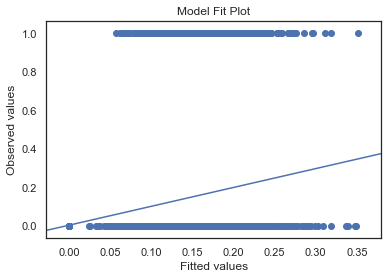

In [51]:
yhat = res.mu
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [52]:
#Ordinary Least Squares regression (OLS)
lm = sm.OLS(y1,x1).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     30_day_readmission   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.319
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           0.000282
Time:                        17:36:56   Log-Likelihood:                -1078.3
No. Observations:                2903   AIC:                             2207.
Df Residuals:                    2878   BIC:                             2356.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
FEMA

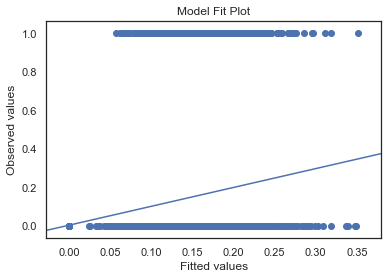

In [54]:
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [55]:
x_train2 = sm.add_constant(x1)
lm2 = sm.OLS(y1,x_train2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:     30_day_readmission   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.319
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           0.000282
Time:                        17:36:56   Log-Likelihood:                -1078.3
No. Observations:                2903   AIC:                             2207.
Df Residuals:                    2878   BIC:                             2356.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [56]:
import statsmodels.api as sm

Xtrain2 = sm.add_constant(x1)
logit2 = sm.Logit(y1, Xtrain2)
result2 = logit2.fit()
print(result2.summary())


         Current function value: 0.407322
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     30_day_readmission   No. Observations:                 2903
Model:                          Logit   Df Residuals:                     2878
Method:                           MLE   Df Model:                           24
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.02467
Time:                        17:36:56   Log-Likelihood:                -1182.5
converged:                      False   LL-Null:                       -1212.4
Covariance Type:            nonrobust   LLR p-value:                 6.759e-05
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -6.9274        nan        nan        nan         nan      

Model Selection
Wow! so much work to get ready for a model. This is always true in data science. You spend 80-90% cleaning and preparing data.

In this section, we train a few machine learning models and use a few techniques for optimizing them. We will then select the best model based on performance on the validation set.

We will utilize the following functions to evaluate the performance of the model.

In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x1, y1, test_size=0.20, random_state=42)

In [58]:
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, Xtrain, ytrain, cv=10))))
logreg.fit(Xtrain, ytrain)
print("Dev Set score: {:.2%}".format(logreg.score(Xtest, ytest)))

Cross Validation Score: 85.14%
Dev Set score: 85.89%


In [59]:
import statsmodels.api as sm
Xtrain2 = sm.add_constant(Xtrain)
logit2 = sm.Logit(ytrain, Xtrain2)
result2 = logit2.fit()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(result2.summary())
logit2_coefs = pd.DataFrame(result2.params)
logit2_coefs.reset_index(level=0, inplace=True)
logit2_coefs.columns = ["Feature", "Coefficient"]
logit2_pvals = pd.DataFrame(result2.pvalues)
logit2_pvals.reset_index(level=0, inplace=True)
logit2_pvals.columns = ["Feature", "pVal"]
logit2_coefs = logit2_coefs.merge(logit2_pvals, how="inner", on=["Feature"])
logit2_coefs = logit2_coefs[logit2_coefs.pVal <0.01]
logit2_coefs

         Current function value: 0.409537
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     30_day_readmission   No. Observations:                 2322
Model:                          Logit   Df Residuals:                     2297
Method:                           MLE   Df Model:                           24
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.02546
Time:                        17:36:57   Log-Likelihood:                -950.94
converged:                      False   LL-Null:                       -975.79
Covariance Type:            nonrobust   LLR p-value:                  0.001551
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -5.1369   9.67e+06  -5.31e-07      1.000    -1.9e+07     1

Empty DataFrame
Columns: [Feature, Coefficient, pVal]
Index: []

In [60]:
#Feature Engneering
#First, let's reset our original dataset, without the unwanted features.
x1 = df_dumm.drop('30_day_readmission',axis=1)
y1 = df_dumm['30_day_readmission'].to_numpy()
# standardize the data attributes
x3 = preprocessing.scale(x1)

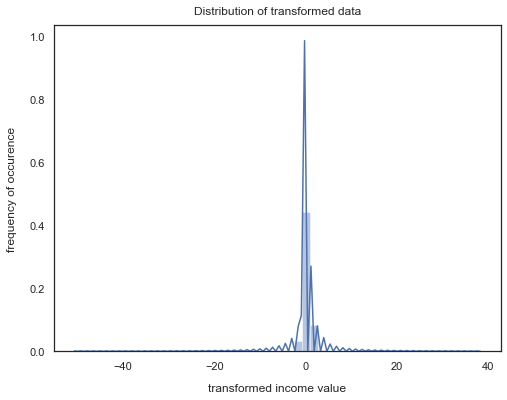

In [61]:
plt.figure(figsize=(8, 6))
sns.distplot(x3)
plt.title("Distribution of transformed data", y=1.015)
plt.xlabel("transformed income value", labelpad=12)
plt.ylabel("frequency of occurence", labelpad=12);

In [62]:
#Datasplit
Xtrain, Xtest, ytrain, ytest = train_test_split(x3, y1, test_size = 0.20, random_state = 42)

In [63]:
#logistic regression
lr=LogisticRegression(random_state = 42)
# Cross validation on multiple model to see which models gives the best results
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(lr, Xtrain, ytrain, cv=10))))

lr.fit(Xtrain, ytrain)
print("Dev Set score: {:.2%}".format(lr.score(Xtest, ytest)))

y_train_preds = lr.predict_proba(Xtrain)[:,1]
y_valid_preds = lr.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
lrg = lr.decision_function(Xtest)
fpr, tpr,_=roc_curve(lr.predict(Xtrain),ytrain,drop_intermediate=False)

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(ytrain,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))


###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Cross Validation Score: 85.14%
Dev Set score: 85.89%
Logistic Regression
Training:
AUC:0.610
accuracy:0.851
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.149
 
Validation:
AUC:0.586
accuracy:0.859
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      1.00      0.92       499
No Readmission       0.00      0.00      0.00        82

      accuracy                           0.86       581
     macro avg       0.43      0.50      0.46       581
  weighted avg       0.74      0.86      0.79       581

Original ROC area: 0.586
Bootstrap #1 ROC area: 0.626
Bootstrap #2 ROC area: 0.600
Bootstrap #3 ROC area: 0.624
Bootstrap #4 ROC area: 0.611
Bootstrap #5 ROC area: 0.612
Bootstrap #6 ROC area: 0.637
Bootstrap #7 ROC area: 0.606
Bootstrap #8 ROC area: 0.611
Bootstrap #9 ROC area: 0.620
Bootstrap #10 ROC area: 0.610
Bootstrap #11 ROC area: 0.627
Bootstrap #12 ROC area: 0.604
Bootstra

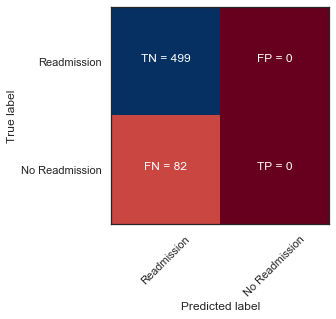

Average precision-recall score: 0.188


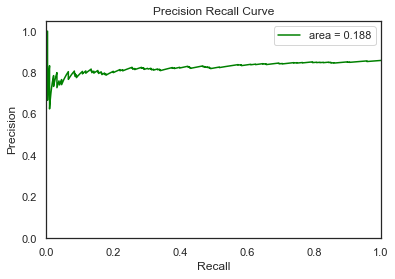

In [64]:
#Make plots
plot_cm(lr, y_valid_preds.round())
plot_aucprc(lr, lrg)

In [65]:
#L2 Ridge Regression

log = LogisticRegression(penalty='l2', solver='liblinear')
log.fit(Xtrain, ytrain)
y_train_preds = log.predict_proba(Xtrain)[:,1]
y_valid_preds = log.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
logl = lr.decision_function(Xtest)
fpr, tpr,_=roc_curve(log.predict(Xtrain),ytrain,drop_intermediate=False)

print('Logistic Regression')
print('Training:')
log_train_auc, log_train_accuracy, log_train_recall, \
    log_train_precision, log_train_specificity = print_report(ytrain,y_train_preds, thresh)
print('Validation:')
log_valid_auc, log_valid_accuracy, log_valid_recall, \
    log_valid_precision, log_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))


###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Logistic Regression
Training:
AUC:0.610
accuracy:0.851
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.149
 
Validation:
AUC:0.586
accuracy:0.859
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      1.00      0.92       499
No Readmission       0.00      0.00      0.00        82

      accuracy                           0.86       581
     macro avg       0.43      0.50      0.46       581
  weighted avg       0.74      0.86      0.79       581

Original ROC area: 0.586
Bootstrap #1 ROC area: 0.626
Bootstrap #2 ROC area: 0.600
Bootstrap #3 ROC area: 0.624
Bootstrap #4 ROC area: 0.611
Bootstrap #5 ROC area: 0.612
Bootstrap #6 ROC area: 0.637
Bootstrap #7 ROC area: 0.606
Bootstrap #8 ROC area: 0.611
Bootstrap #9 ROC area: 0.620
Bootstrap #10 ROC area: 0.610
Bootstrap #11 ROC area: 0.627
Bootstrap #12 ROC area: 0.604
Bootstrap #13 ROC area: 0.619
Bootstrap #14 ROC area: 0.614
B

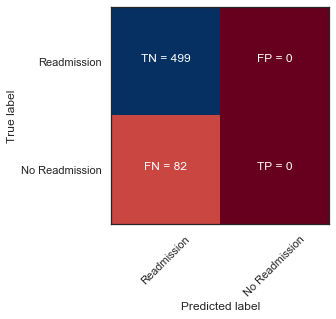

Average precision-recall score: 0.188


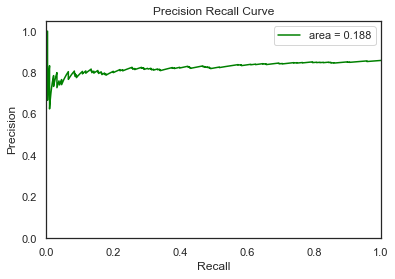

In [66]:
#Make plots
plot_cm(log, y_valid_preds.round())
plot_aucprc(log, logl)

In [67]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(Xtrain, ytrain)

y_train_preds = regr.predict(Xtrain)
y_valid_preds = regr.predict(Xtest)


#Calculating the score,
regre = regr.predict(Xtest)
regrw, regrpr, thresholds = roc_curve(ytest, regre)

print('ElasticNetCV')
print('Training:')
regr_train_auc, regr_train_accuracy, regr_train_recall, \
    regr_train_precision, regr_train_specificity = print_report(ytrain,y_train_preds, thresh)

print('Validation:')
regr_valid_auc, regr_valid_accuracy, regr_valid_recall, \
    regr_valid_precision, regr_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

ElasticNetCV
Training:
AUC:0.607
accuracy:0.851
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.149
 
Validation:
AUC:0.582
accuracy:0.859
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      1.00      0.92       499
No Readmission       0.00      0.00      0.00        82

      accuracy                           0.86       581
     macro avg       0.43      0.50      0.46       581
  weighted avg       0.74      0.86      0.79       581

Original ROC area: 0.582
Bootstrap #1 ROC area: 0.623
Bootstrap #2 ROC area: 0.601
Bootstrap #3 ROC area: 0.625
Bootstrap #4 ROC area: 0.606
Bootstrap #5 ROC area: 0.611
Bootstrap #6 ROC area: 0.631
Bootstrap #7 ROC area: 0.593
Bootstrap #8 ROC area: 0.599
Bootstrap #9 ROC area: 0.615
Bootstrap #10 ROC area: 0.601
Bootstrap #11 ROC area: 0.622
Bootstrap #12 ROC area: 0.601
Bootstrap #13 ROC area: 0.614
Bootstrap #14 ROC area: 0.610
Bootstra

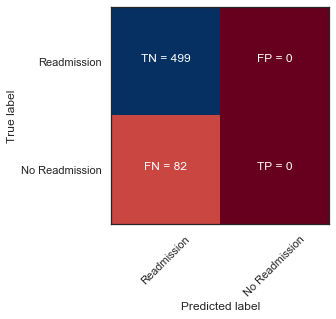

Average precision-recall score: 0.190


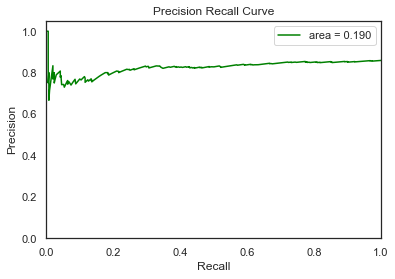

In [68]:
#Make plots
plot_cm(regr, y_valid_preds.round())
plot_aucprc(regr, regre)

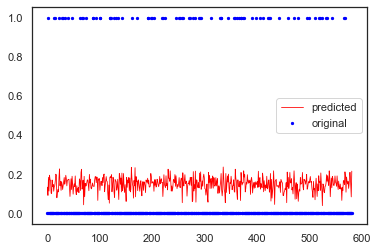

In [69]:
x_ax = range(len(Xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, y_valid_preds, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [70]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(Xtrain, ytrain)

y_train_preds = knn.predict_proba(Xtrain)[:,1]
y_valid_preds = knn.predict_proba(Xtest)[:,1]


#Calculating the score,
scorey = knn.predict_proba(Xtest)[:,1]
knnr, knnpr, thresholds = roc_curve(ytest, scorey)

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(ytrain,y_train_preds, thresh)

print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


KNN
Training:
AUC:0.604
accuracy:0.851
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.149
 
Validation:
AUC:0.599
accuracy:0.859
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      1.00      0.92       499
No Readmission       0.00      0.00      0.00        82

      accuracy                           0.86       581
     macro avg       0.43      0.50      0.46       581
  weighted avg       0.74      0.86      0.79       581

Original ROC area: 0.599
Bootstrap #1 ROC area: 0.603
Bootstrap #2 ROC area: 0.599
Bootstrap #3 ROC area: 0.606
Bootstrap #4 ROC area: 0.604
Bootstrap #5 ROC area: 0.600
Bootstrap #6 ROC area: 0.640
Bootstrap #7 ROC area: 0.591
Bootstrap #8 ROC area: 0.616
Bootstrap #9 ROC area: 0.613
Bootstrap #10 ROC area: 0.582
Bootstrap #11 ROC area: 0.633
Bootstrap #12 ROC area: 0.600
Bootstrap #13 ROC area: 0.628
Bootstrap #14 ROC area: 0.609
Bootstrap #15 ROC

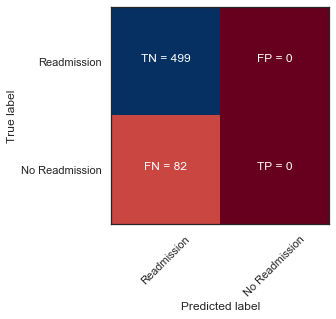

Average precision-recall score: 0.176


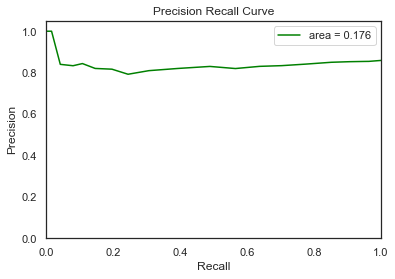

In [71]:
#Make plots
plot_cm(knn, y_valid_preds.round())
plot_aucprc(knn, scorey)

In [72]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(Xtrain, ytrain)

y_train_preds = sgdc.predict_proba(Xtrain)[:,1]
y_valid_preds = sgdc.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
sgdcd = sgdc.decision_function(Xtest)
sdpr, sdpr,_=roc_curve(sgdc.predict(Xtrain),ytrain,drop_intermediate=False)

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Stochastic Gradient Descend
Training:
AUC:0.608
accuracy:0.851
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.149
 
Validation:
AUC:0.590
accuracy:0.859
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      1.00      0.92       499
No Readmission       0.00      0.00      0.00        82

      accuracy                           0.86       581
     macro avg       0.43      0.50      0.46       581
  weighted avg       0.74      0.86      0.79       581

Original ROC area: 0.590
Bootstrap #1 ROC area: 0.624
Bootstrap #2 ROC area: 0.599
Bootstrap #3 ROC area: 0.623
Bootstrap #4 ROC area: 0.607
Bootstrap #5 ROC area: 0.608
Bootstrap #6 ROC area: 0.636
Bootstrap #7 ROC area: 0.604
Bootstrap #8 ROC area: 0.609
Bootstrap #9 ROC area: 0.619
Bootstrap #10 ROC area: 0.604
Bootstrap #11 ROC area: 0.623
Bootstrap #12 ROC area: 0.604
Bootstrap #13 ROC area: 0.616
Bootstrap #14 ROC area:

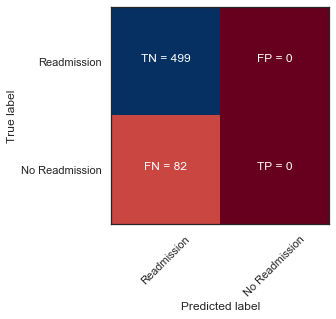

Average precision-recall score: 0.185


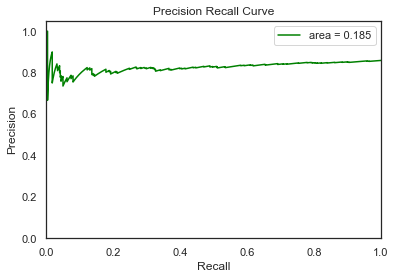

In [73]:
#Make plots
plot_cm(sgdc, y_valid_preds.round())
plot_aucprc(sgdc, sgdcd)

In [74]:
nb = GaussianNB()
nb.fit(Xtrain, ytrain)

GaussianNB()

In [75]:
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
y_train_preds = nb.predict_proba(Xtrain)[:,1]
y_valid_preds = nb.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
nbsc = nb.predict_proba(Xtest)[:,1]
nbpt, nbpr,thresholds =roc_curve(ytest, nbsc)

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))




print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Naive Bayes
Training:
AUC:0.600
accuracy:0.173
recall:0.986
precision:0.151
specificity:0.031
prevalence:0.149
 
Validation:
AUC:0.564
accuracy:0.169
recall:0.976
precision:0.143
specificity:0.036
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.90      0.04      0.07       499
No Readmission       0.14      0.98      0.25        82

      accuracy                           0.17       581
     macro avg       0.52      0.51      0.16       581
  weighted avg       0.79      0.17      0.09       581

Original ROC area: 0.564
Bootstrap #1 ROC area: 0.599
Bootstrap #2 ROC area: 0.581
Bootstrap #3 ROC area: 0.626
Bootstrap #4 ROC area: 0.589
Bootstrap #5 ROC area: 0.598
Bootstrap #6 ROC area: 0.622
Bootstrap #7 ROC area: 0.606
Bootstrap #8 ROC area: 0.606
Bootstrap #9 ROC area: 0.593
Bootstrap #10 ROC area: 0.607
Bootstrap #11 ROC area: 0.632
Bootstrap #12 ROC area: 0.593
Bootstrap #13 ROC area: 0.613
Bootstrap #14 ROC area: 0.602
Bootstrap

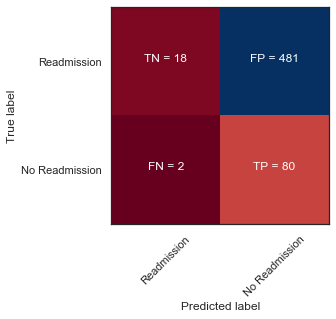

Average precision-recall score: 0.168


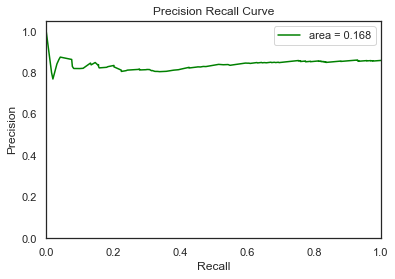

In [76]:
#Make plots
plot_cm(nb, y_valid_preds.round())
plot_aucprc(nb, nbsc)

In [77]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [78]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(Xtrain, ytrain)
y_train_preds = tree.predict_proba(Xtrain)[:,1]
y_valid_preds = tree.predict_proba(Xtest)[:,1]


#Calculating the score,
dts =tree.predict_proba(Xtest)[:,1]
dtpr, dpr, thresholds = roc_curve(ytest, dts)

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(),  target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Decision Tree
Training:
AUC:0.844
accuracy:0.883
recall:0.249
precision:0.878
specificity:0.990
prevalence:0.149
 
Validation:
AUC:0.512
accuracy:0.833
recall:0.049
precision:0.174
specificity:0.962
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      0.96      0.91       499
No Readmission       0.17      0.05      0.08        82

      accuracy                           0.83       581
     macro avg       0.52      0.51      0.49       581
  weighted avg       0.76      0.83      0.79       581

Original ROC area: 0.512
Bootstrap #1 ROC area: 0.842
Bootstrap #2 ROC area: 0.853
Bootstrap #3 ROC area: 0.831
Bootstrap #4 ROC area: 0.842
Bootstrap #5 ROC area: 0.847
Bootstrap #6 ROC area: 0.848
Bootstrap #7 ROC area: 0.848
Bootstrap #8 ROC area: 0.859
Bootstrap #9 ROC area: 0.840
Bootstrap #10 ROC area: 0.818
Bootstrap #11 ROC area: 0.834
Bootstrap #12 ROC area: 0.847
Bootstrap #13 ROC area: 0.838
Bootstrap #14 ROC area: 0.851
Bootstr

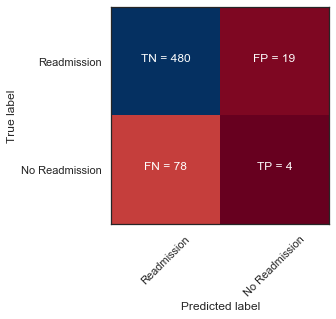

Average precision-recall score: 0.152


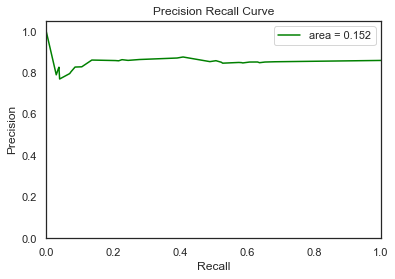

In [79]:
#Make plots
plot_cm(tree, y_valid_preds.round())
plot_aucprc(tree, dts)

In [80]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=6, random_state=42)

In [81]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(Xtrain, ytrain)
#Calculating the score,
scrf =rf.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(ytest, scrf)

y_train_preds = rf.predict_proba(Xtrain)[:,1]
y_valid_preds = rf.predict_proba(Xtest)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Random Forest
Training:
AUC:0.806
accuracy:0.851
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.149
 
Validation:
AUC:0.626
accuracy:0.859
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      1.00      0.92       499
No Readmission       0.00      0.00      0.00        82

      accuracy                           0.86       581
     macro avg       0.43      0.50      0.46       581
  weighted avg       0.74      0.86      0.79       581

Original ROC area: 0.626
Bootstrap #1 ROC area: 0.821
Bootstrap #2 ROC area: 0.808
Bootstrap #3 ROC area: 0.811
Bootstrap #4 ROC area: 0.808
Bootstrap #5 ROC area: 0.804
Bootstrap #6 ROC area: 0.823
Bootstrap #7 ROC area: 0.792
Bootstrap #8 ROC area: 0.810
Bootstrap #9 ROC area: 0.812
Bootstrap #10 ROC area: 0.798
Bootstrap #11 ROC area: 0.811
Bootstrap #12 ROC area: 0.805
Bootstrap #13 ROC area: 0.810
Bootstrap #14 ROC area: 0.804
Bootstr

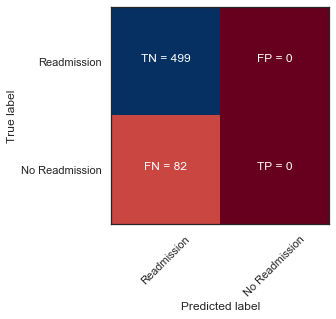

Average precision-recall score: 0.208


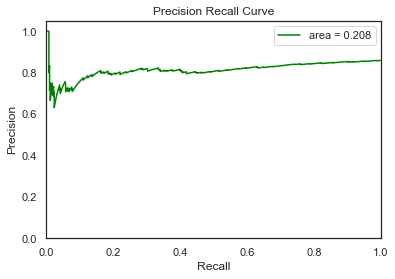

In [82]:
#Make plots
plot_cm(rf, y_valid_preds.round())
plot_aucprc(rf, scrf)

In [83]:
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(Xtrain, ytrain)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [84]:
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(Xtrain, ytrain)

y_train_preds = gbc.predict_proba(Xtrain)[:,1]
y_valid_preds = gbc.predict_proba(Xtest)[:,1]

#Calculating the score,
gbcd =gbc.predict_proba(Xtest)[:,1]
gbcs, gbcst, thresholds = roc_curve(ytest, gbcd)

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(ytrain,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Gradient Boosting Classifier
Training:
AUC:0.929
accuracy:0.908
recall:0.417
precision:0.917
specificity:0.993
prevalence:0.149
 
Validation:
AUC:0.549
accuracy:0.831
recall:0.073
precision:0.214
specificity:0.956
prevalence:0.141
 
                precision    recall  f1-score   support

  Readmission        0.86      0.96      0.91       499
No Readmission       0.21      0.07      0.11        82

      accuracy                           0.83       581
     macro avg       0.54      0.51      0.51       581
  weighted avg       0.77      0.83      0.79       581

Original ROC area: 0.549
Bootstrap #1 ROC area: 0.935
Bootstrap #2 ROC area: 0.925
Bootstrap #3 ROC area: 0.928
Bootstrap #4 ROC area: 0.936
Bootstrap #5 ROC area: 0.917
Bootstrap #6 ROC area: 0.940
Bootstrap #7 ROC area: 0.930
Bootstrap #8 ROC area: 0.934
Bootstrap #9 ROC area: 0.927
Bootstrap #10 ROC area: 0.921
Bootstrap #11 ROC area: 0.928
Bootstrap #12 ROC area: 0.937
Bootstrap #13 ROC area: 0.937
Bootstrap #14 ROC area

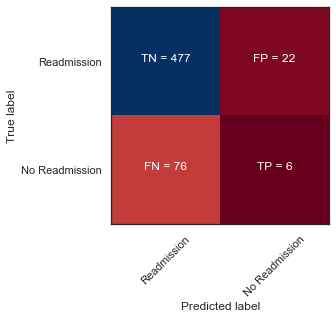

Average precision-recall score: 0.183


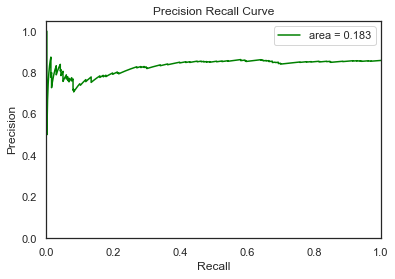

In [85]:
#Make plots
plot_cm(gbc, y_valid_preds.round())
plot_aucprc(gbc, gbcd)

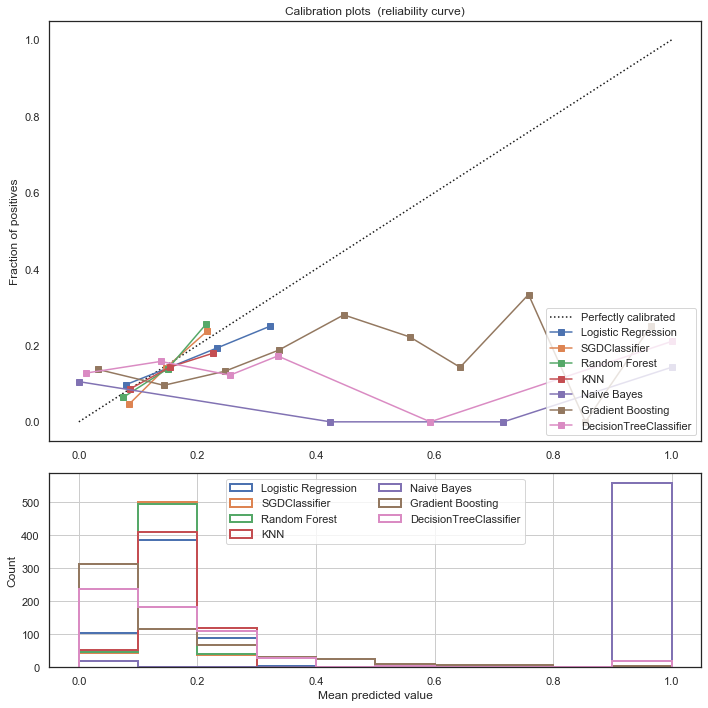

In [86]:
# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic Regression'),
                  (sgdc, 'SGDClassifier'),
                  (rf, 'Random Forest'),
                  (knn,'KNN'),
                  (nb, 'Naive Bayes' ),
                  (gbc, 'Gradient Boosting' ),
                  (tree , 'DecisionTreeClassifier')
                  
                ]:
    clf.fit(Xtrain, ytrain)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(ytest, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.grid(b=None)
plt.show()

Comparing the models¶


In [87]:
##Computing false and true positive rates
fpr_log, tpr_log, thresholds = roc_curve(ytest, lrg)#logistic regression
knnr, knnpr, thresholds = roc_curve(ytest, scorey)#knn classifier
rfpr, rtpr, thresholds = roc_curve(ytest, scrf)#Random Forest
sdcpr, sdcpr, thresholds = roc_curve(ytest, sgdcd) # SD Classifier
gbcs, gbcst, thresholds = roc_curve(ytest, gbcd)#Gradient Boosting Classifier
regrw, regrpr, thresholds = roc_curve(ytest, regre)#ElasticNet
dtpr, dpr, thresholds = roc_curve(ytest, dts)# Decision Tree
nbpt, nbpr,thresholds =roc_curve(ytest, nbsc)#Naive Bayes
# fpr_adamod, tpr_adamod, thresholds = roc_curve(Ytest,ygridadascore )#Hyperparameters Tunning for AdaBoosted
# fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )
#Calculating the score,


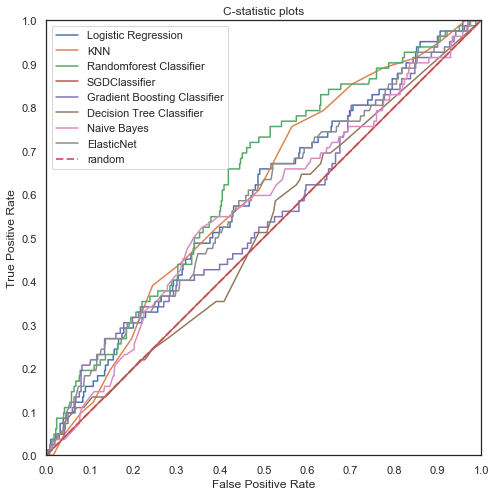

In [88]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(knnr, knnpr, label='KNN')
plt.plot(rfpr, rtpr, label='Randomforest Classifier')
plt.plot(sdcpr, sdcpr, label='SGDClassifier')
plt.plot(gbcs, gbcst, label='Gradient Boosting Classifier')
plt.plot(dtpr, dpr, label='Decision Tree Classifier')
plt.plot(nbpt, nbpr, label='Naive Bayes')#ElasticNetCV
plt.plot(regrw, regrpr, label='ElasticNet')#ElasticNetCV

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.title('C-statistic plots')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(b=None)
plt.show()

In [89]:
scores = cross_val_score(rf, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('Random Forest')
print("Score is %f +/-  %f" % (mean_score, ci))
print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Random Forest
Score is 0.852911 +/-  0.001069
95 percent probability that if this experiment were repeated over and over the average score would be between 0.851842 and 0.853981


In [90]:
scores = cross_val_score(gbc, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('gb')
print("Score is %f +/-  %f" % (mean_score, ci))
print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

gb
Score is 0.807425 +/-  0.008009
95 percent probability that if this experiment were repeated over and over the average score would be between 0.799416 and 0.815435


In [91]:
scores = cross_val_score(nb, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('nb')
print("Score is %f +/-  %f" % (mean_score, ci))
print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

nb
Score is 0.156386 +/-  0.004488
95 percent probability that if this experiment were repeated over and over the average score would be between 0.151898 and 0.160874


In [92]:
scores = cross_val_score(sgdc, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('sgdc')
print("Score is %f +/-  %f" % (mean_score, ci))
print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

sgdc
Score is 0.852911 +/-  0.001069
95 percent probability that if this experiment were repeated over and over the average score would be between 0.851842 and 0.853981


In [93]:
scores = cross_val_score(lr, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('lr')
print("Score is %f +/-  %f" % (mean_score, ci))
print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

lr
Score is 0.852911 +/-  0.001069
95 percent probability that if this experiment were repeated over and over the average score would be between 0.851842 and 0.853981


In [94]:

scores = cross_val_score(log, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('lr')
print("Score is %f +/-  %f" % (mean_score, ci))
print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

lr
Score is 0.852911 +/-  0.001069
95 percent probability that if this experiment were repeated over and over the average score would be between 0.851842 and 0.853981


In [95]:
scores = cross_val_score(knn, x3, y1, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print('knn')
print("Score is %f +/-  %f" % (mean_score, ci))

print('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

knn
Score is 0.852911 +/-  0.001069
95 percent probability that if this experiment were repeated over and over the average score would be between 0.851842 and 0.853981


In [96]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x3, y1)
Xtrain, Xtest, ytrain, ytest = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)


In [97]:
#logistic regression
lr=LogisticRegression(random_state = 42)
#Cross validation on multiple model to see which models gives the best results
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(lr, Xtrain, ytrain, cv=10))))

lr.fit(Xtrain, ytrain)
print("Dev Set score: {:.2%}".format(lr.score(Xtest, ytest)))

y_train_preds = lr.predict_proba(Xtrain)[:,1]
y_valid_preds = lr.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
lrg = lr.decision_function(Xtest)
fpr, tpr,_=roc_curve(lr.predict(Xtrain),ytrain,drop_intermediate=False)

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(ytrain,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))


###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Cross Validation Score: 58.32%
Dev Set score: 60.75%
Logistic Regression
Training:
AUC:0.632
accuracy:0.591
recall:0.641
precision:0.586
specificity:0.539
prevalence:0.504
 
Validation:
AUC:0.650
accuracy:0.607
recall:0.681
precision:0.581
specificity:0.538
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.64      0.54      0.59       511
No Readmission       0.58      0.68      0.63       480

      accuracy                           0.61       991
     macro avg       0.61      0.61      0.61       991
  weighted avg       0.61      0.61      0.61       991

Original ROC area: 0.650
Bootstrap #1 ROC area: 0.635
Bootstrap #2 ROC area: 0.650
Bootstrap #3 ROC area: 0.625
Bootstrap #4 ROC area: 0.631
Bootstrap #5 ROC area: 0.615
Bootstrap #6 ROC area: 0.627
Bootstrap #7 ROC area: 0.638
Bootstrap #8 ROC area: 0.634
Bootstrap #9 ROC area: 0.635
Bootstrap #10 ROC area: 0.629
Bootstrap #11 ROC area: 0.634
Bootstrap #12 ROC area: 0.632
Bootstra

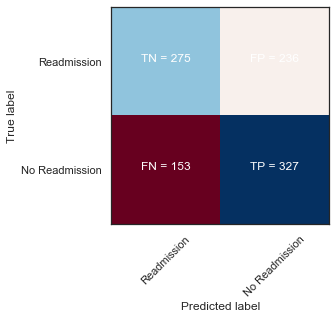

Average precision-recall score: 0.588


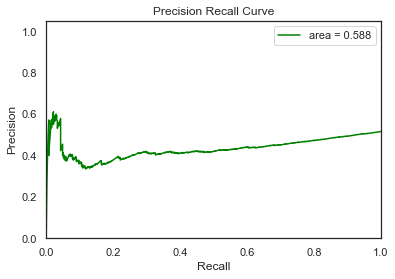

In [98]:
#Make plots
plot_cm(lr, y_valid_preds.round())
plot_aucprc(lr, lrg)

In [99]:
#L2 Ridge Regression

log = LogisticRegression(penalty='l2', solver='liblinear')
log.fit(Xtrain, ytrain)
y_train_preds = log.predict_proba(Xtrain)[:,1]
y_valid_preds = log.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
logl = lr.decision_function(Xtest)
fpr, tpr,_=roc_curve(log.predict(Xtrain),ytrain,drop_intermediate=False)

print('Logistic Regression')
print('Training:')
log_train_auc, log_train_accuracy, log_train_recall, \
    log_train_precision, log_train_specificity = print_report(ytrain,y_train_preds, thresh)
print('Validation:')
log_valid_auc, log_valid_accuracy, log_valid_recall, \
    log_valid_precision, log_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))


###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Logistic Regression
Training:
AUC:0.632
accuracy:0.591
recall:0.641
precision:0.586
specificity:0.539
prevalence:0.504
 
Validation:
AUC:0.650
accuracy:0.607
recall:0.681
precision:0.581
specificity:0.538
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.64      0.54      0.59       511
No Readmission       0.58      0.68      0.63       480

      accuracy                           0.61       991
     macro avg       0.61      0.61      0.61       991
  weighted avg       0.61      0.61      0.61       991

Original ROC area: 0.650
Bootstrap #1 ROC area: 0.635
Bootstrap #2 ROC area: 0.650
Bootstrap #3 ROC area: 0.625
Bootstrap #4 ROC area: 0.631
Bootstrap #5 ROC area: 0.615
Bootstrap #6 ROC area: 0.627
Bootstrap #7 ROC area: 0.638
Bootstrap #8 ROC area: 0.634
Bootstrap #9 ROC area: 0.635
Bootstrap #10 ROC area: 0.629
Bootstrap #11 ROC area: 0.634
Bootstrap #12 ROC area: 0.632
Bootstrap #13 ROC area: 0.650
Bootstrap #14 ROC area: 0.632
B

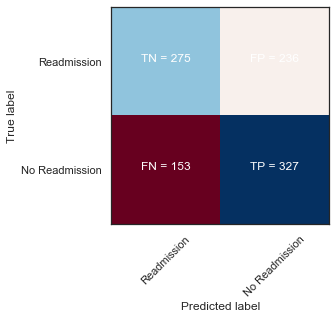

Average precision-recall score: 0.588


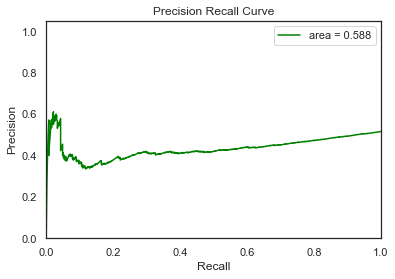

In [100]:
#Make plots
plot_cm(log, y_valid_preds.round())
plot_aucprc(log, logl)

In [101]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(Xtrain, ytrain)

y_train_preds = regr.predict(Xtrain)
y_valid_preds = regr.predict(Xtest)


#Calculating the score,
regre = regr.predict(Xtest)
regrw, regrpr, thresholds = roc_curve(ytest, regre)

print('ElasticNetCV')
print('Training:')
regr_train_auc, regr_train_accuracy, regr_train_recall, \
    regr_train_precision, regr_train_specificity = print_report(ytrain,y_train_preds, thresh)

print('Validation:')
regr_valid_auc, regr_valid_accuracy, regr_valid_recall, \
    regr_valid_precision, regr_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

ElasticNetCV
Training:
AUC:0.632
accuracy:0.595
recall:0.648
precision:0.589
specificity:0.540
prevalence:0.504
 
Validation:
AUC:0.649
accuracy:0.609
recall:0.688
precision:0.582
specificity:0.536
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.65      0.54      0.59       511
No Readmission       0.58      0.69      0.63       480

      accuracy                           0.61       991
     macro avg       0.61      0.61      0.61       991
  weighted avg       0.62      0.61      0.61       991

Original ROC area: 0.649
Bootstrap #1 ROC area: 0.636
Bootstrap #2 ROC area: 0.649
Bootstrap #3 ROC area: 0.626
Bootstrap #4 ROC area: 0.631
Bootstrap #5 ROC area: 0.614
Bootstrap #6 ROC area: 0.628
Bootstrap #7 ROC area: 0.637
Bootstrap #8 ROC area: 0.633
Bootstrap #9 ROC area: 0.633
Bootstrap #10 ROC area: 0.629
Bootstrap #11 ROC area: 0.634
Bootstrap #12 ROC area: 0.631
Bootstrap #13 ROC area: 0.651
Bootstrap #14 ROC area: 0.632
Bootstra

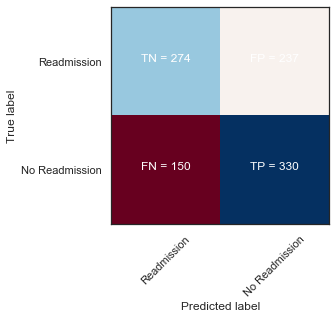

Average precision-recall score: 0.587


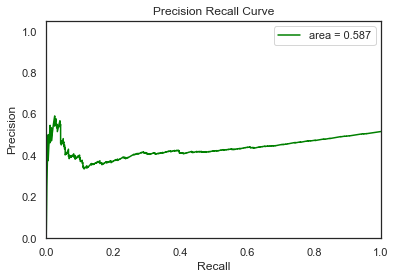

In [102]:
#Make plots
plot_cm(regr, y_valid_preds.round())
plot_aucprc(regr, regre)

In [103]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(Xtrain, ytrain)

y_train_preds = knn.predict_proba(Xtrain)[:,1]
y_valid_preds = knn.predict_proba(Xtest)[:,1]


#Calculating the score,
scorey = knn.predict_proba(Xtest)[:,1]
knnr, knnpr, thresholds = roc_curve(ytest, scorey)

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(ytrain,y_train_preds, thresh)

print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


KNN
Training:
AUC:0.670
accuracy:0.622
recall:0.821
precision:0.590
specificity:0.393
prevalence:0.504
 
Validation:
AUC:0.656
accuracy:0.606
recall:0.831
precision:0.564
specificity:0.362
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.71      0.40      0.51       511
No Readmission       0.56      0.83      0.67       480

      accuracy                           0.61       991
     macro avg       0.64      0.61      0.59       991
  weighted avg       0.64      0.61      0.59       991

Original ROC area: 0.656
Bootstrap #1 ROC area: 0.672
Bootstrap #2 ROC area: 0.685
Bootstrap #3 ROC area: 0.672
Bootstrap #4 ROC area: 0.670
Bootstrap #5 ROC area: 0.664
Bootstrap #6 ROC area: 0.673
Bootstrap #7 ROC area: 0.675
Bootstrap #8 ROC area: 0.681
Bootstrap #9 ROC area: 0.678
Bootstrap #10 ROC area: 0.663
Bootstrap #11 ROC area: 0.666
Bootstrap #12 ROC area: 0.674
Bootstrap #13 ROC area: 0.688
Bootstrap #14 ROC area: 0.671
Bootstrap #15 ROC

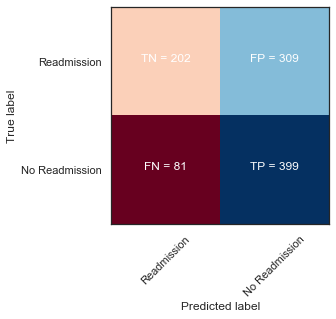

Average precision-recall score: 0.614


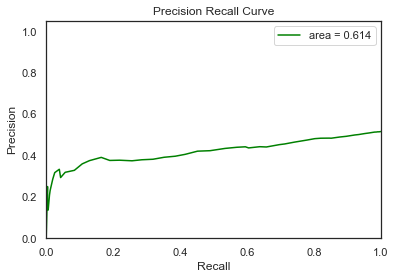

In [104]:
#Make plots
plot_cm(knn, y_valid_preds.round())
plot_aucprc(knn, scorey)

In [105]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(Xtrain, ytrain)

y_train_preds = sgdc.predict_proba(Xtrain)[:,1]
y_valid_preds = sgdc.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
sgdcd = sgdc.decision_function(Xtest)
sdpr, sdpr,_=roc_curve(sgdc.predict(Xtrain),ytrain,drop_intermediate=False)

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Stochastic Gradient Descend
Training:
AUC:0.631
accuracy:0.593
recall:0.649
precision:0.587
specificity:0.536
prevalence:0.504
 
Validation:
AUC:0.646
accuracy:0.616
recall:0.696
precision:0.587
specificity:0.540
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.65      0.54      0.59       511
No Readmission       0.59      0.70      0.64       480

      accuracy                           0.62       991
     macro avg       0.62      0.62      0.61       991
  weighted avg       0.62      0.62      0.61       991

Original ROC area: 0.646
Bootstrap #1 ROC area: 0.636
Bootstrap #2 ROC area: 0.648
Bootstrap #3 ROC area: 0.626
Bootstrap #4 ROC area: 0.630
Bootstrap #5 ROC area: 0.613
Bootstrap #6 ROC area: 0.629
Bootstrap #7 ROC area: 0.637
Bootstrap #8 ROC area: 0.632
Bootstrap #9 ROC area: 0.632
Bootstrap #10 ROC area: 0.627
Bootstrap #11 ROC area: 0.632
Bootstrap #12 ROC area: 0.630
Bootstrap #13 ROC area: 0.650
Bootstrap #14 ROC area:

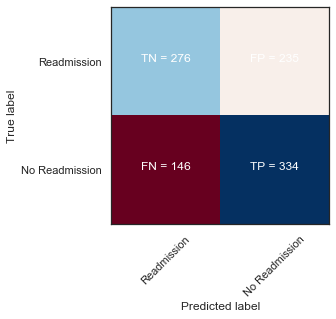

Average precision-recall score: 0.583


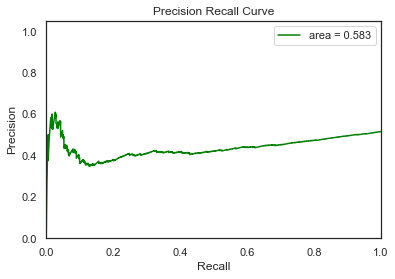

In [106]:
#Make plots
plot_cm(sgdc, y_valid_preds.round())
plot_aucprc(sgdc, sgdcd)

In [107]:
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
y_train_preds = nb.predict_proba(Xtrain)[:,1]
y_valid_preds = nb.predict_proba(Xtest)[:,1]

# calculate the False Positive and True Positive rate to get the ROC curve  
nbsc = nb.predict_proba(Xtest)[:,1]
nbpt, nbpr,thresholds =roc_curve(ytest, nbsc)

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))




print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Naive Bayes
Training:
AUC:0.627
accuracy:0.512
recall:0.996
precision:0.508
specificity:0.020
prevalence:0.504
 
Validation:
AUC:0.643
accuracy:0.493
recall:0.996
precision:0.489
specificity:0.022
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.85      0.02      0.04       511
No Readmission       0.49      1.00      0.66       480

      accuracy                           0.49       991
     macro avg       0.67      0.51      0.35       991
  weighted avg       0.67      0.49      0.34       991

Original ROC area: 0.643
Bootstrap #1 ROC area: 0.645
Bootstrap #2 ROC area: 0.631
Bootstrap #3 ROC area: 0.625
Bootstrap #4 ROC area: 0.630
Bootstrap #5 ROC area: 0.607
Bootstrap #6 ROC area: 0.622
Bootstrap #7 ROC area: 0.634
Bootstrap #8 ROC area: 0.635
Bootstrap #9 ROC area: 0.635
Bootstrap #10 ROC area: 0.621
Bootstrap #11 ROC area: 0.628
Bootstrap #12 ROC area: 0.632
Bootstrap #13 ROC area: 0.638
Bootstrap #14 ROC area: 0.618
Bootstrap

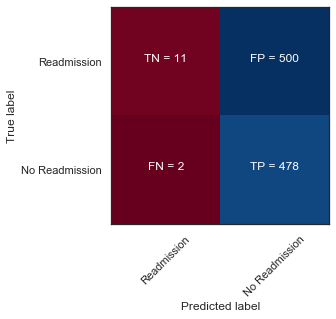

Average precision-recall score: 0.586


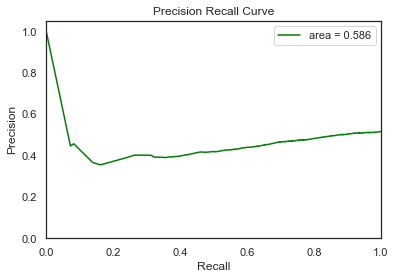

In [108]:
#Make plots
plot_cm(nb, y_valid_preds.round())
plot_aucprc(nb, nbsc)

In [109]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(Xtrain, ytrain)
y_train_preds = tree.predict_proba(Xtrain)[:,1]
y_valid_preds = tree.predict_proba(Xtest)[:,1]


#Calculating the score,
dts =tree.predict_proba(Xtest)[:,1]
dtpr, dpr, thresholds = roc_curve(ytest, dts)

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(),  target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Decision Tree
Training:
AUC:0.889
accuracy:0.790
recall:0.912
precision:0.735
specificity:0.658
prevalence:0.504
 
Validation:
AUC:0.835
accuracy:0.751
recall:0.898
precision:0.685
specificity:0.597
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.86      0.61      0.72       511
No Readmission       0.69      0.90      0.78       480

      accuracy                           0.75       991
     macro avg       0.77      0.76      0.75       991
  weighted avg       0.78      0.75      0.75       991

Original ROC area: 0.835
Bootstrap #1 ROC area: 0.890
Bootstrap #2 ROC area: 0.884
Bootstrap #3 ROC area: 0.887
Bootstrap #4 ROC area: 0.882
Bootstrap #5 ROC area: 0.890
Bootstrap #6 ROC area: 0.876
Bootstrap #7 ROC area: 0.886
Bootstrap #8 ROC area: 0.886
Bootstrap #9 ROC area: 0.886
Bootstrap #10 ROC area: 0.894
Bootstrap #11 ROC area: 0.890
Bootstrap #12 ROC area: 0.889
Bootstrap #13 ROC area: 0.895
Bootstrap #14 ROC area: 0.895
Bootstr

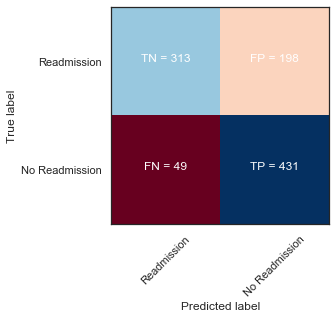

Average precision-recall score: 0.789


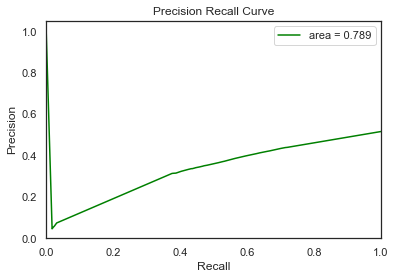

In [110]:
#Make plots
plot_cm(tree, y_valid_preds.round())
plot_aucprc(tree, dts)

In [111]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(Xtrain, ytrain)
#Calculating the score,
scrf =rf.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(ytest, scrf)

y_train_preds = rf.predict_proba(Xtrain)[:,1]
y_valid_preds = rf.predict_proba(Xtest)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(ytrain,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))



print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Random Forest
Training:
AUC:0.916
accuracy:0.823
recall:0.861
precision:0.802
specificity:0.784
prevalence:0.504
 
Validation:
AUC:0.896
accuracy:0.802
recall:0.844
precision:0.770
specificity:0.763
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.84      0.76      0.80       511
No Readmission       0.77      0.84      0.81       480

      accuracy                           0.80       991
     macro avg       0.80      0.80      0.80       991
  weighted avg       0.81      0.80      0.80       991

Original ROC area: 0.896
Bootstrap #1 ROC area: 0.915
Bootstrap #2 ROC area: 0.917
Bootstrap #3 ROC area: 0.919
Bootstrap #4 ROC area: 0.916
Bootstrap #5 ROC area: 0.916
Bootstrap #6 ROC area: 0.915
Bootstrap #7 ROC area: 0.917
Bootstrap #8 ROC area: 0.914
Bootstrap #9 ROC area: 0.916
Bootstrap #10 ROC area: 0.918
Bootstrap #11 ROC area: 0.917
Bootstrap #12 ROC area: 0.917
Bootstrap #13 ROC area: 0.924
Bootstrap #14 ROC area: 0.915
Bootstr

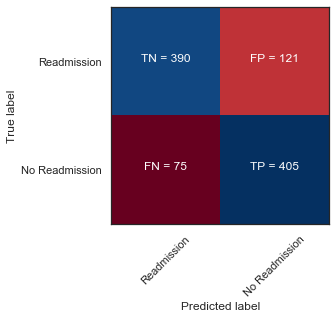

Average precision-recall score: 0.909


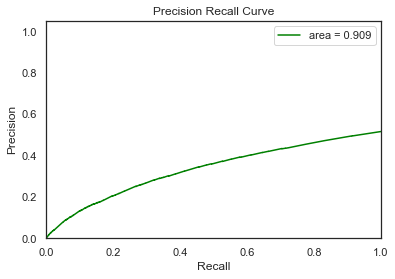

In [112]:
#Make plots
plot_cm(rf, y_valid_preds.round())
plot_aucprc(rf,scrf)

In [113]:
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(Xtrain, ytrain)

y_train_preds = gbc.predict_proba(Xtrain)[:,1]
y_valid_preds = gbc.predict_proba(Xtest)[:,1]

#Calculating the score,
gbcd =gbc.predict_proba(Xtest)[:,1]
gbcs, gbcst, thresholds = roc_curve(ytest, gbcd)

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(ytrain,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(ytest,y_valid_preds, thresh)
print(classification_report(ytest, y_valid_preds.round(), target_names=target_names))
print("Original ROC area: {:0.3f}".format(roc_auc_score(ytest, y_valid_preds)))

###################################################################################

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_train_preds), len(y_train_preds))
    if len(np.unique(ytrain[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytrain[indices], y_train_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))
print("####################################################################################################")
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_valid_preds), len(y_valid_preds))
    if len(np.unique(ytest[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(ytest[indices], y_valid_preds[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))


Gradient Boosting Classifier
Training:
AUC:0.983
accuracy:0.939
recall:0.891
precision:0.987
specificity:0.988
prevalence:0.504
 
Validation:
AUC:0.927
accuracy:0.875
recall:0.835
precision:0.899
specificity:0.912
prevalence:0.484
 
                precision    recall  f1-score   support

  Readmission        0.86      0.91      0.88       511
No Readmission       0.90      0.84      0.87       480

      accuracy                           0.87       991
     macro avg       0.88      0.87      0.87       991
  weighted avg       0.88      0.87      0.87       991

Original ROC area: 0.927
Bootstrap #1 ROC area: 0.983
Bootstrap #2 ROC area: 0.983
Bootstrap #3 ROC area: 0.982
Bootstrap #4 ROC area: 0.985
Bootstrap #5 ROC area: 0.984
Bootstrap #6 ROC area: 0.983
Bootstrap #7 ROC area: 0.981
Bootstrap #8 ROC area: 0.982
Bootstrap #9 ROC area: 0.984
Bootstrap #10 ROC area: 0.984
Bootstrap #11 ROC area: 0.984
Bootstrap #12 ROC area: 0.984
Bootstrap #13 ROC area: 0.983
Bootstrap #14 ROC area

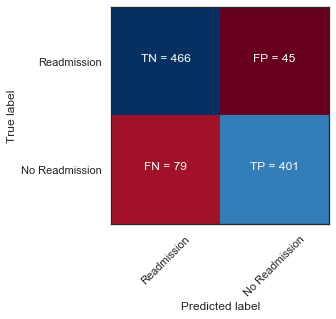

Average precision-recall score: 0.945


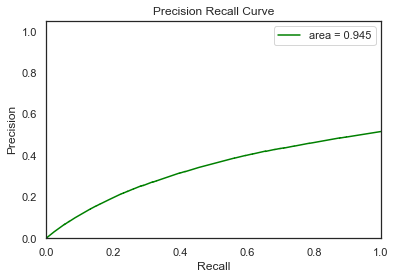

In [114]:
#Make plots
plot_cm(gbc, y_valid_preds.round())
plot_aucprc(gbc, gbcd)

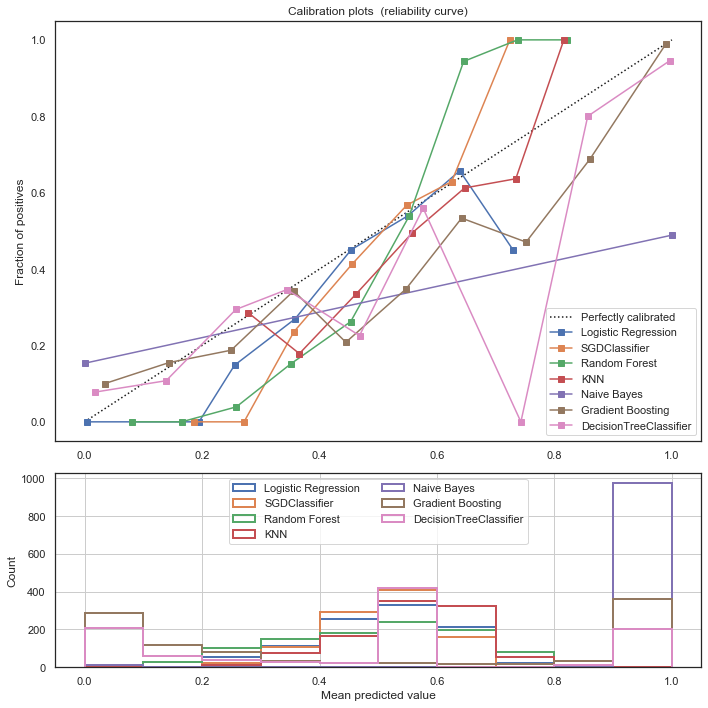

In [115]:
# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic Regression'),
                  (sgdc, 'SGDClassifier'),
                  (rf, 'Random Forest'),
                  (knn,'KNN'),
                  (nb, 'Naive Bayes' ),
                  (gbc, 'Gradient Boosting' ),
                  (tree , 'DecisionTreeClassifier')
                ]:
    clf.fit(Xtrain, ytrain)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(ytest, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.grid(b=None)
plt.show()

In [116]:


##Computing false and true positive rates
fpr_log, tpr_log, thresholds = roc_curve(ytest, lrg)#logistic regression
knnr, knnpr, thresholds = roc_curve(ytest, scorey)#knn classifier
rfpr, rtpr, thresholds = roc_curve(ytest, scrf)#Random Forest
sdcpr, sdcpr, thresholds = roc_curve(ytest, sgdcd) # SD Classifier
gbcs, gbcst, thresholds = roc_curve(ytest, gbcd)#Gradient Boosting Classifier
regrw, regrpr, thresholds = roc_curve(ytest, regre)#ElasticNet
dtpr, dpr, thresholds = roc_curve(ytest, dts)# Decision Tree
nbpt, nbpr,thresholds =roc_curve(ytest, nbsc)#Naive Bayes
# fpr_adamod, tpr_adamod, thresholds = roc_curve(Ytest,ygridadascore )#Hyperparameters Tunning for AdaBoosted
# fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )
#Calculating the score,



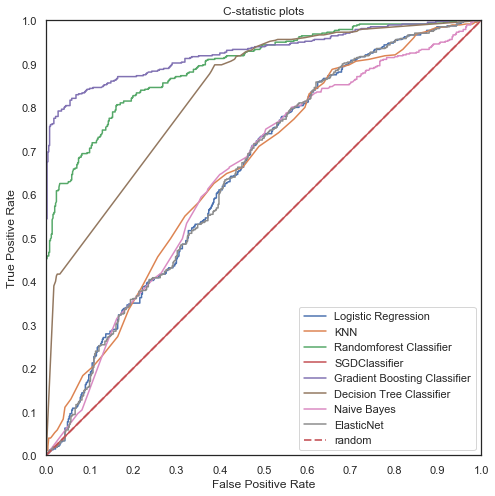

In [117]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(knnr, knnpr, label='KNN')
plt.plot(rfpr, rtpr, label='Randomforest Classifier')
plt.plot(sdcpr, sdcpr, label='SGDClassifier')
plt.plot(gbcs, gbcst, label='Gradient Boosting Classifier')
plt.plot(dtpr, dpr, label='Decision Tree Classifier')
plt.plot(nbpt, nbpr, label='Naive Bayes')#ElasticNetCV
plt.plot(regrw, regrpr, label='ElasticNet')#ElasticNetCV

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.title('C-statistic plots')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(b=None)
plt.show()